In [2]:
from ggplot import *
import os
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
!matplotlib inline

sns.set(color_codes=True)

os.chdir(r'../datacode')
path1 = 'carprice.csv'
car = pd.read_csv(path1, na_values='NA')

Traceback (most recent call last):
  File "C:\Users\ariwh\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


,car_id,price,Kilometers,hp,Brand,Sport,age,Users,gas,Metalilic,CC,Weight,QuartTax,Automatic,red,Owner_gender,door
0,3548,48750,NaN,110,6,YES,7,1,590.0,NO,1800,1170.0,100,YES,NO,M,4
1,903,16610,NaN,110,3,NO,8,1,391.0,YES,2200,1250.0,270,YES,NO,F,4
2,3903,27100,3040.0,110,2,YES,8,1,478.0,NO,1900,1186.0,120,YES,YES,M,4
3,5098,24240,4690.0,110,5,NO,8,1,NaN,NO,1800,1170.0,100,YES,NO,M,4
4,3364,13030,5820.0,110,5,NO,9,1,NaN,YES,2200,1250.0,80,NO,NO,F,4


In [5]:
new_cars = car[(car.age<15)]
x = new_cars.groupby(['hp'])['price'].mean().reset_index()
x

,hp,price
0,70,20572.222222
1,90,17151.333333
2,110,21900.000000
3,192,30490.714286


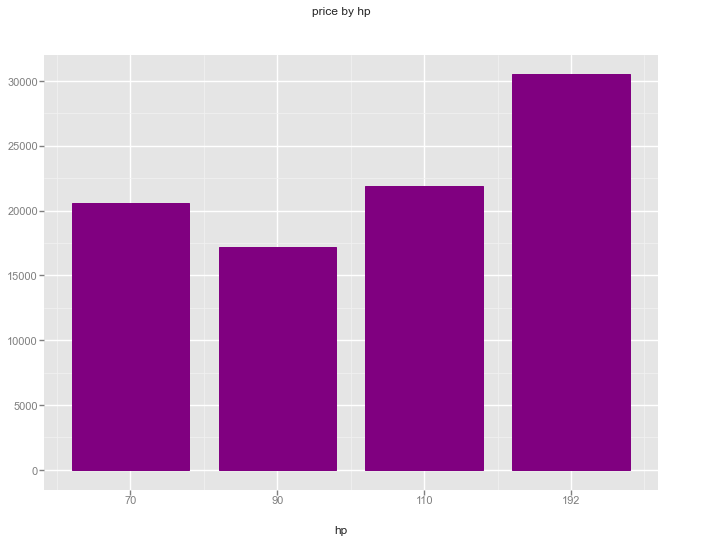

<ggplot: (135234772559)>

In [8]:
ggplot(x, aes('hp', weight='price')) + geom_bar(fill='purple')\ #hp is horsepower
+ scale_y_continuous(labels='comma') + ggtitle('price by hp')

In [11]:
D = car[(car.age<50)].groupby(['age', 'Automatic'])\
['price'].mean().reset_index()
D

,age,Automatic,price
0,7,YES,48750.000000
1,8,YES,22650.000000
2,9,NO,13656.666667
3,9,YES,25894.000000
4,10,NO,13513.333333
...,...,...,...
76,46,NO,7566.666667
77,46,YES,13866.666667
78,47,YES,10730.000000
79,48,NO,6660.000000


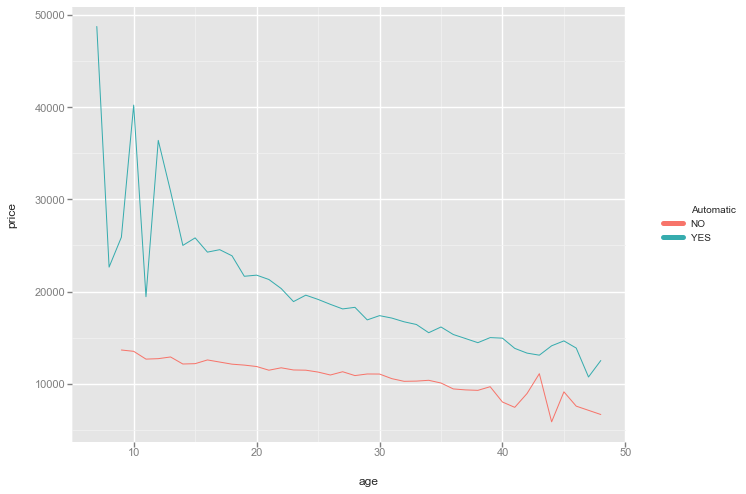

<ggplot: (135234750961)>

In [15]:
ggplot(aes(x='age',y='price',color='price', colour='Automatic'), data=D)\
+ geom_line()

   Person_ID  Cups_Per_Week   Age Gender Employment    Education   Income  \
0          5              1  60.0      F   fulltime  high school  45000.0   
1          6              1  40.0      F   fulltime  high school  46000.0   
2          9              3   NaN      F   fulltime  high school  47000.0   
3         14              5  20.0      F   fulltime   gradschool  65000.0   
4         15              0  50.0      F   fulltime  high school  46000.0   

   Married Own_Home Smoker Favourite_NonAlc_Drink     Veg  cup_tea  spend_food  
0  married       no    yes                    tea  nonveg        0       11787  
1  married       no     no                  other     veg        6       18674  
2  married       no     no                 coffee     veg        1       14814  
3   single       no    yes              softdrink  nonveg        0       22997  
4  married      yes     no                 coffee  nonveg        5       14606  


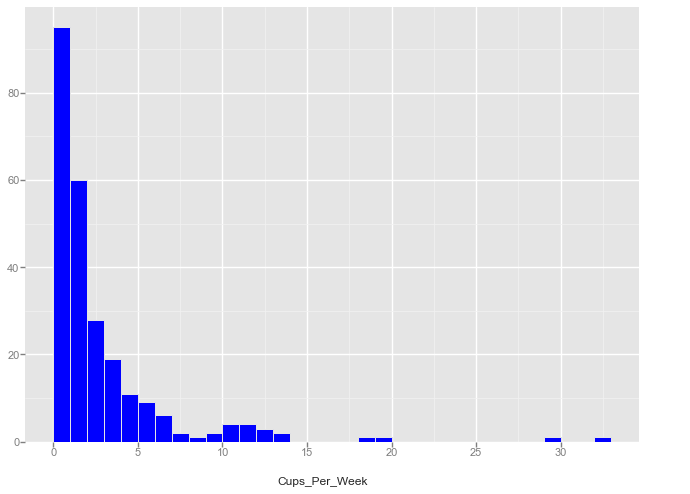

<ggplot: (135234750958)>

In [17]:
path = 'coffee_info.csv'
coffee = pd.read_csv(path, na_values='NA')
print(coffee.head())

ggplot(aes(x='Cups_Per_Week'), data=coffee) +\
geom_histogram(binwidth=1, fill='blue')

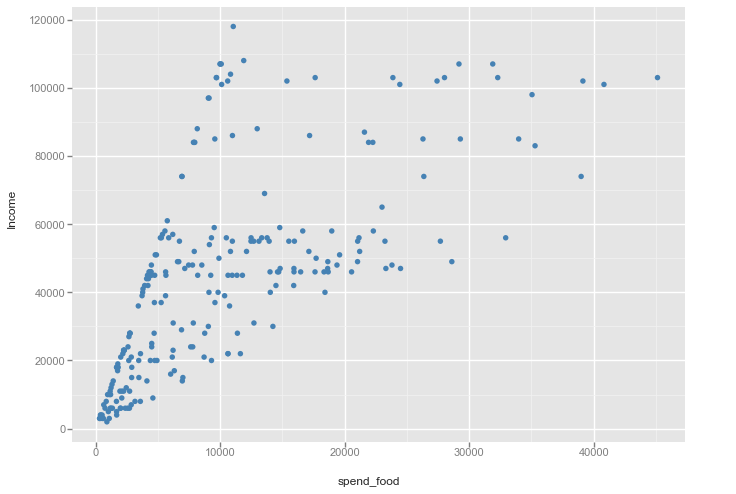

<ggplot: (135240548109)>

In [21]:
ggplot(aes(x='spend_food', y='Income'), data=coffee) +\
geom_point(color='steelblue', size=30)

In [22]:
from sklearn import datasets, linear_model

In [25]:
regr = linear_model.LinearRegression()

coffee['spend_food'] = coffee['spend_food'].fillna(0.0)
coffee['Income'] = coffee['Income'].fillna(0.0)

L = list(coffee['spend_food'])
train = np.array([[L[j]] for j in range(len(L))])
Y = coffee.Income

regr.fit(train,Y)

y_pred = regr.predict(train)

print('Coeficient: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coeficient: 
 [2.06919705]
Intercept: 
 22498.13919723759


In [27]:
coffee2=coffee.copy()
coffee2['prediction_income'] = y_pred

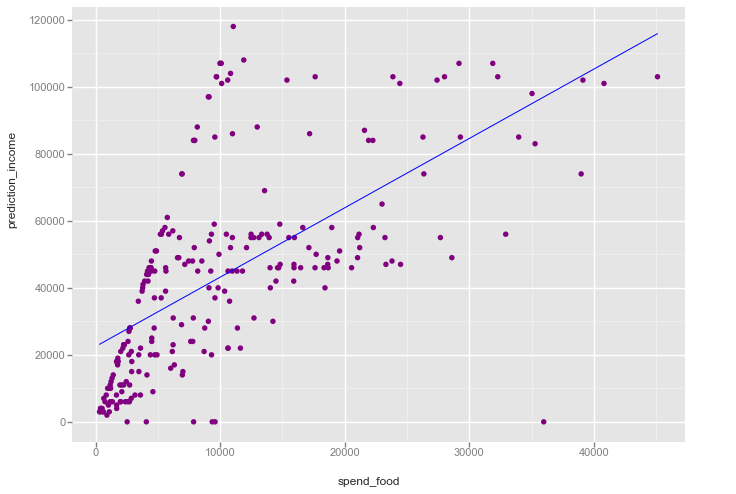

<ggplot: (135242003032)>

In [29]:
ggplot(aes(x='spend_food', y='Income'), data=coffee2) +\
geom_point(color='purple', size=30) +\
geom_line(aes(x='spend_food', y='prediction_income'), color='blue')

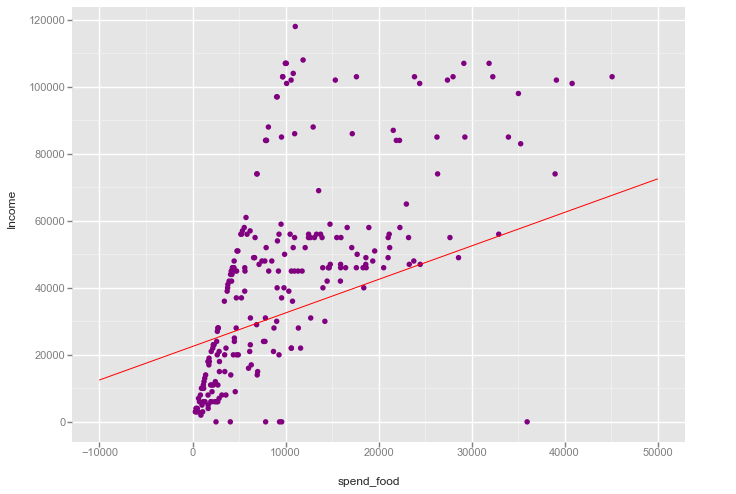

<ggplot: (135242001601)>

In [30]:
ggplot(aes(x='spend_food', y='Income'), data=coffee2) +\
geom_point(color='purple', size=30) +\
geom_abline(intercept=22498, color='red')

In [ ]:
regr = linear_model.LinearRegression()

coffee['spend_food'] = coffee['spend_food'].fillna(0.0)
coffee['Income'] = coffee['Income'].fillna(0.0)

L = list(coffee['spend_food'])
train = np.array([[L[j]] for j in range(len(L))])
Y = coffee.Income

regr.fit(train,Y)

y_pred = regr.predict(train)

print('Coeficient: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

In [38]:
len(L)

250

In [39]:
len(train)

250

In [40]:
len(y_pred)

250